In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Table 1


| Attribute | Description |
|-----------|:-------------|
| F1        | F1 score obtained from evaluating the RF on the test data |
| Method    | where features come from; raw data, pca, un- / pre- / re-trained CNN |
| Class     | which part of the brain |
| Set       | from which set the data comes from; set 1 and 2 from paper |
| Iter      | in which iteration the result was obtained. Here, we do 10 iterations |

In [5]:
# load data
df_table1                     = pd.read_pickle('table1_data_doublenew')
# aggregate iterations in mean and std
df_table1_iterAggregated_mean = df_table1.groupby(['set', 'method', 'class'], as_index=False).mean()
df_table1_iterAggregated_std  = df_table1.groupby(['set', 'method', 'class'], as_index=False).std()
# pivot to table shape
df_table1_mean_reshaped       = df_table1_iterAggregated_mean.pivot(index='method', columns=['set', 'class'], values='f1')
df_table1_std_reshaped        = df_table1_iterAggregated_std.pivot(index='method', columns=['set', 'class'], values='f1')
# reorder rows
df_table1_mean_final = df_table1_mean_reshaped.reindex(['raw', 'pca', 'un_trained', 'pre_trained', 'refined'])
df_table1_std_final  = df_table1_std_reshaped.reindex(['raw', 'pca', 'un_trained', 'pre_trained', 'refined'])
# display and save
display(df_table1_mean_final)
df_table1_mean_final.to_pickle('table1_mean')
display(df_table1_std_final)
df_table1_std_final.to_pickle('table1_std')


set                 1                                                    \
class             Avg        CC        CG       CST        FX     Other   
method                                                                    
raw          0.257215  0.398581  0.147830  0.348409  0.134041  0.765591   
pca          0.293318  0.418292  0.256288  0.352515  0.146178  0.793486   
un_trained   0.156745  0.116034  0.122888  0.176811  0.211249  0.395747   
pre_trained  0.324410  0.524556  0.363063  0.284014  0.126008  0.729024   
refined      0.366573  0.507265  0.350854  0.387594  0.220580  0.791588   

set                 2                                                    \
class             Avg  IFO_left IFO_right  ILF_left ILF_right     Other   
method                                                                    
raw          0.142027  0.138294  0.195077  0.190285  0.203714  0.615030   
pca          0.164220  0.176642  0.240287  0.196002  0.202524  0.661322   
un_trained   0.239635  0.293110  0.303971  0.201536  0.336062  0.079839   
pre_trained  0.379040  0.400944  0.453183  0.313373  0.456348  0.461715   
refined      0.391791  0.404791  0.469130  0.392078  0.453090  0.631488   

set                              
class        SLF_left SLF_right  
method                           
raw          0.017312  0.107481  
pca          0.037274  0.132593  
un_trained   0.021108  0.282023  
pre_trained  0.155092  0.495298  
refined      0.144120  0.487534

set                 1                                                    \
class             Avg        CC        CG       CST        FX     Other   
method                                                                    
raw          0.018787  0.058169  0.048644  0.025453  0.034791  0.026620   
pca          0.020580  0.081573  0.037147  0.029231  0.032259  0.019328   
un_trained   0.022563  0.046027  0.036543  0.026024  0.046944  0.101305   
pre_trained  0.022543  0.069578  0.044436  0.038919  0.020532  0.059113   
refined      0.033239  0.039297  0.071509  0.034713  0.072128  0.065158   

set                 2                                                    \
class             Avg  IFO_left IFO_right  ILF_left ILF_right     Other   
method                                                                    
raw          0.006518  0.022816  0.025838  0.008299  0.022213  0.020175   
pca          0.008454  0.020227  0.025749  0.009769  0.016786  0.020063   
un_trained   0.015157  0.045126  0.035554  0.045326  0.044814  0.037100   
pre_trained  0.016434  0.024317  0.031843  0.083900  0.079707  0.064623   
refined      0.019615  0.050444  0.046045  0.042959  0.079010  0.078388   

set                              
class        SLF_left SLF_right  
method                           
raw          0.010059  0.016455  
pca          0.023659  0.020791  
un_trained   0.006915  0.036012  
pre_trained  0.032339  0.037418  
refined      0.079747  0.033923

To copy paste as markdown, run cell below

In [6]:
print(df_table1_mean_final.to_markdown(tablefmt='github'))
print(df_table1_std_final.to_markdown(tablefmt='github'))

| method      |   (1, 'Avg') |   (1, 'CC') |   (1, 'CG') |   (1, 'CST') |   (1, 'FX') |   (1, 'Other') |   (2, 'Avg') |   (2, 'IFO_left') |   (2, 'IFO_right') |   (2, 'ILF_left') |   (2, 'ILF_right') |   (2, 'Other') |   (2, 'SLF_left') |   (2, 'SLF_right') |
|-------------|--------------|-------------|-------------|--------------|-------------|----------------|--------------|-------------------|--------------------|-------------------|--------------------|----------------|-------------------|--------------------|
| raw         |     0.257215 |    0.398581 |    0.14783  |     0.348409 |    0.134041 |       0.765591 |     0.142027 |          0.138294 |           0.195077 |          0.190285 |           0.203714 |       0.61503  |         0.0173119 |           0.107481 |
| pca         |     0.293318 |    0.418292 |    0.256288 |     0.352515 |    0.146178 |       0.793486 |     0.16422  |          0.176642 |           0.240287 |          0.196002 |           0.202524 |       0.661322 |  

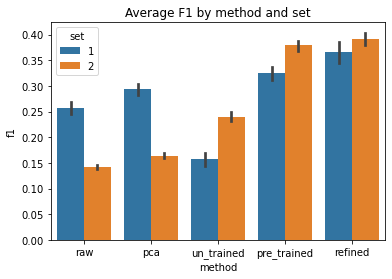

In [7]:
p = sns.barplot(data=df_table1[(df_table1['class'] == 'Avg')], x='method', y='f1', hue='set')
plt.title("Average F1 by method and set")
plt.show()
#p.get_figure().savefig('avg_f1.png', dpi=800)

_________________
# Ablation Study

| Attribute | Description |
|-----------|:-------------|
| F1        | F1 score obtained from evaluating the RF on the test data |
| Ablate    | which component is ablated, i.e. no regularizer used |
| T         | Iterator over annotation cycles, i.e. 'time' |
| Class     | which part of the brain |
| Set       | from which set the data comes from; set 1 and 2 from paper |
| Iter      | in which iteration the result was obtained. Here, we do 10 iterations |

In [46]:
df_ablation = pd.read_pickle('ablation_old_all_new_regional')
df_ablation.head()

,f1,ablate,t,class,set,iter
0,0.426487,full,0,Other,2,0
1,0.404340,full,0,IFO_left,2,0
2,0.412007,full,0,IFO_right,2,0
3,0.254397,full,0,ILF_left,2,0
4,0.298723,full,0,ILF_right,2,0


In [29]:
df_ablation[(df_ablation['ablate'] == 'full') & (df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2) & (df_ablation['t'] == 9)]

,f1,ablate,t,class,set,iter
79,0.534450,full,9,Avg,2,0
79,0.577190,full,9,Avg,2,1
79,0.567862,full,9,Avg,2,2
79,0.515235,full,9,Avg,2,3
79,0.555954,full,9,Avg,2,4
79,0.496764,full,9,Avg,2,5
79,0.540958,full,9,Avg,2,6
79,0.591206,full,9,Avg,2,7
79,0.577983,full,9,Avg,2,8
79,0.592573,full,9,Avg,2,9


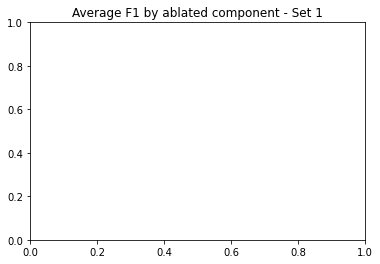

In [33]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 1)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 1")
plt.show()

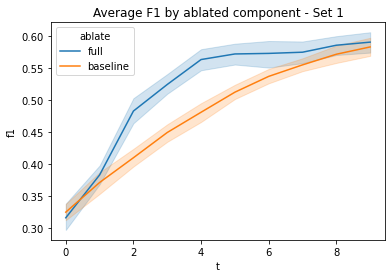

In [27]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 1)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 1")
plt.show()

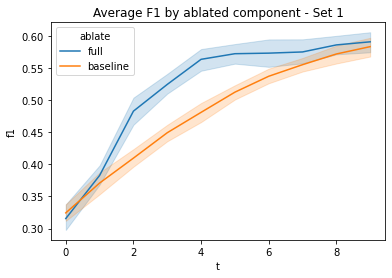

In [23]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 1)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 1")
plt.show()

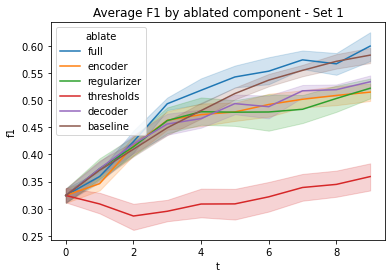

In [9]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 1)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 1")
plt.show()

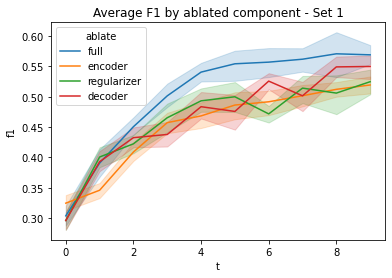

In [26]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 1)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 1")
plt.show()

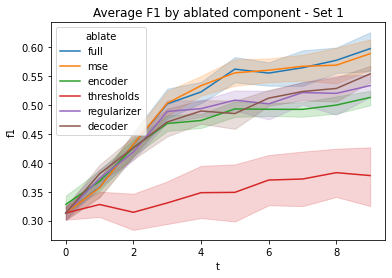

In [22]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 1)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 1")
plt.show()

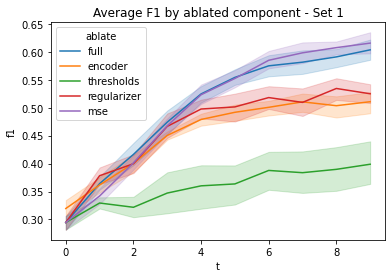

In [8]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 1)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 1")
plt.show()

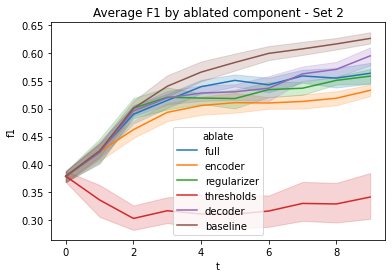

In [10]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 2")
plt.show()

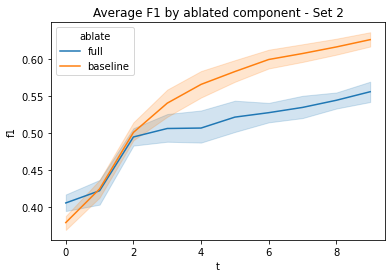

In [24]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 2")
plt.show()

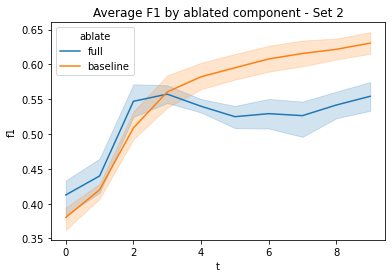

In [34]:
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 2")
plt.show()

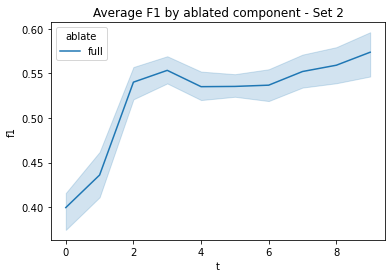

In [36]:
# cat regional
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 2")
plt.show()

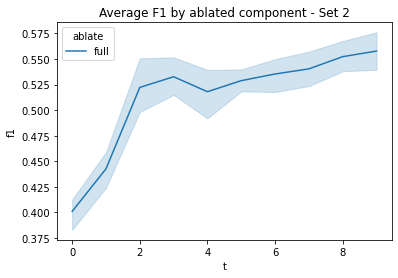

In [43]:
# old regional new local
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 2")
plt.show()

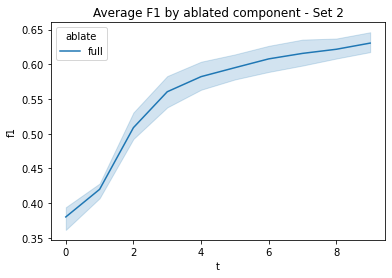

In [45]:
# all old
# old regional new local
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 2")
plt.show()

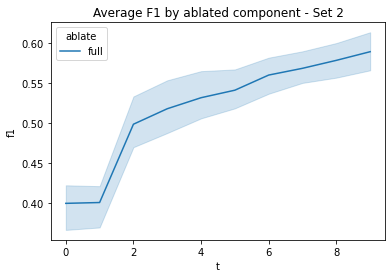

In [47]:
# old all, new regional
p = sns.lineplot(data=df_ablation[(df_ablation['class'] == 'Avg') & (df_ablation['set'] == 2)], x='t', y='f1', hue='ablate')
plt.title("Average F1 by ablated component - Set 2")
plt.show()